In [17]:
import pandas as pd

df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [20]:
df['Spam'] = df.Category.apply( lambda x : 1 if(x=='spam') else 0 )

In [21]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [24]:
from sklearn.model_selection import train_test_split
xtr , xts , ytr , yts = train_test_split( df.Message , df.Spam , test_size=0.25 )

In [25]:
xtr.head()

4708                  Wif my family booking tour package.
3970    Thanks for your message. I really appreciate y...
745       Men like shorter ladies. Gaze up into his eyes.
4609                  We live in the next  &lt;#&gt; mins
519     That way transport is less problematic than on...
Name: Message, dtype: object

# we use Count Vectorizing technique

    Count Vectorization is a text processing technique commonly used in machine learning for converting text data into numerical vectors that machine learning models can understand
    
   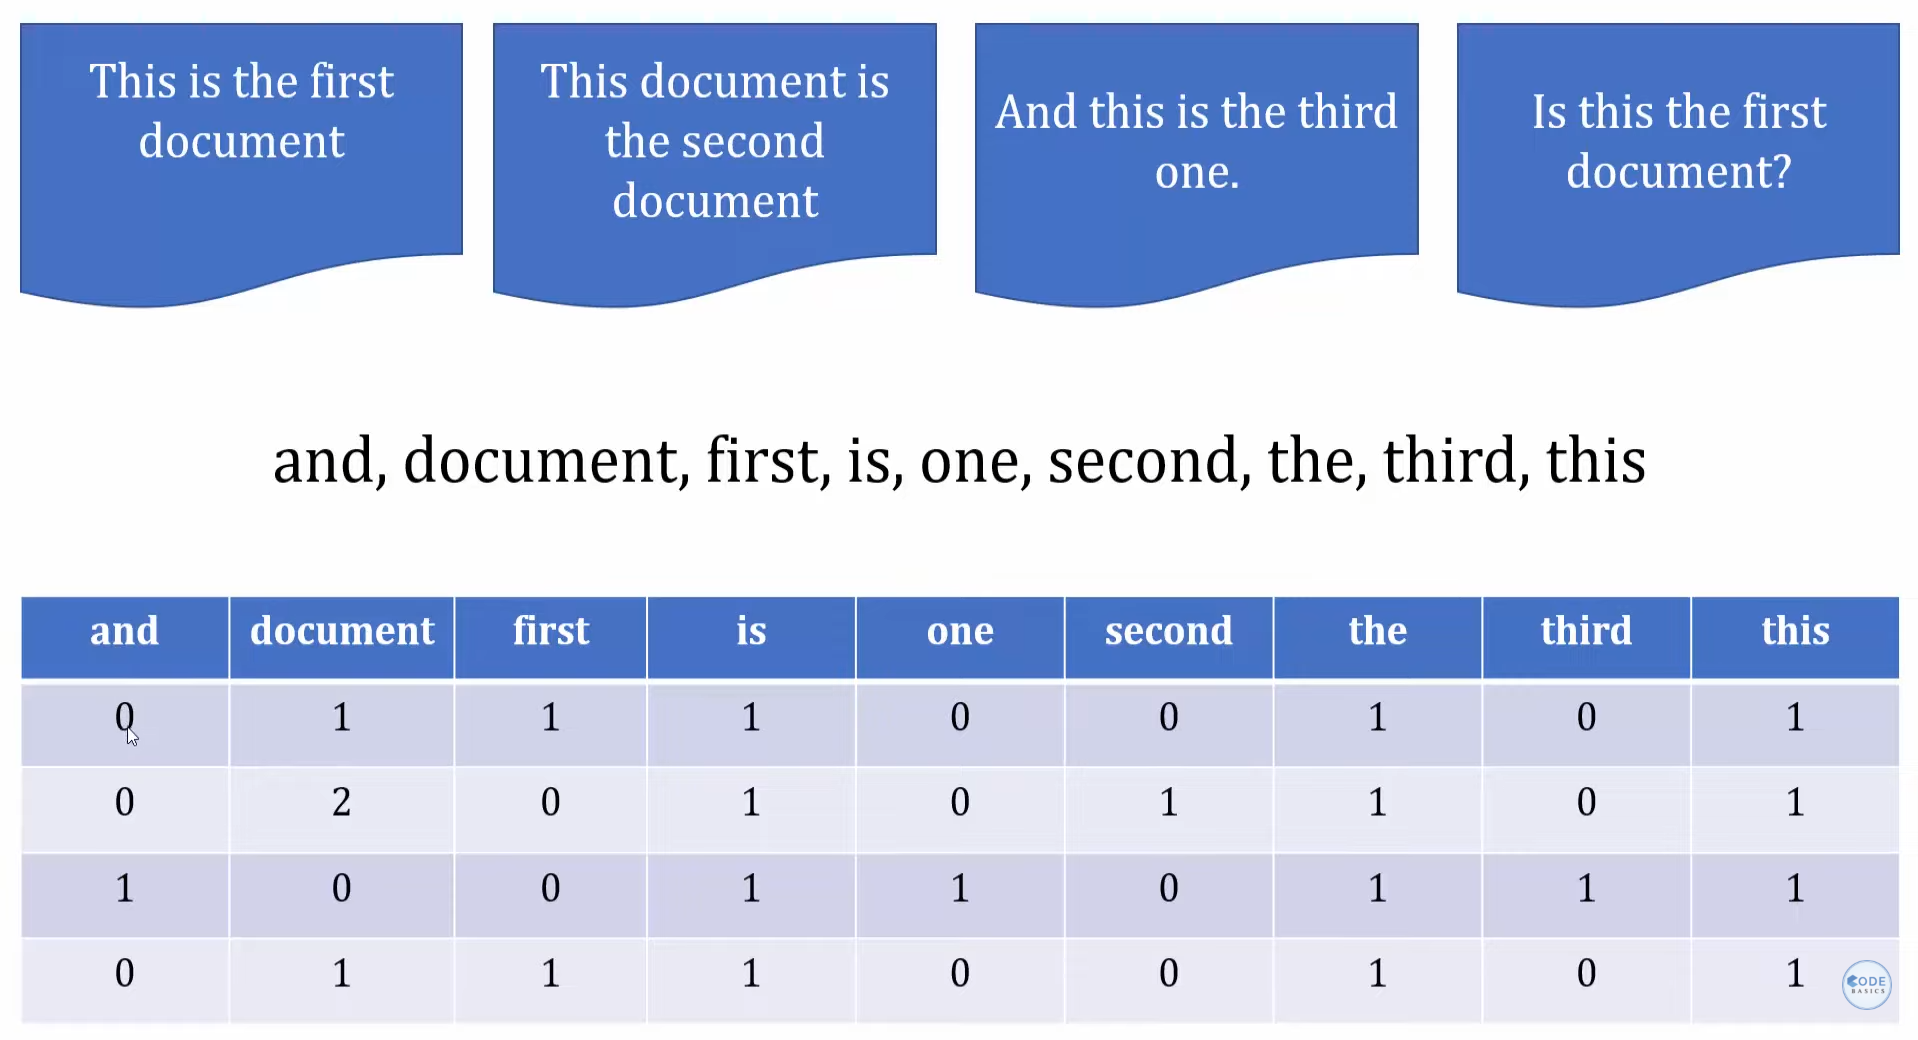
   
  An example on how Sklearn.features_extraction works :
  
  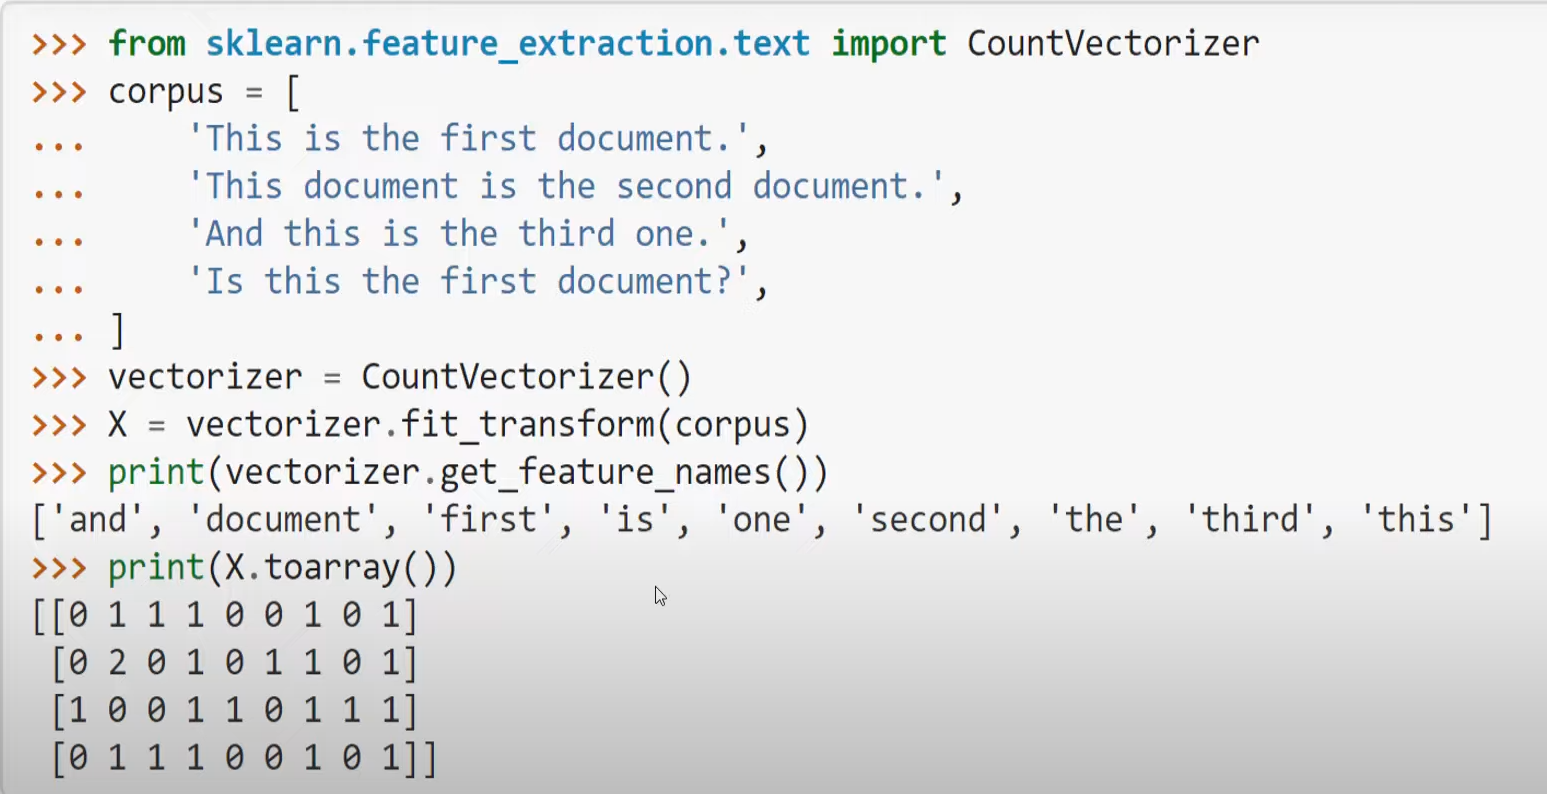

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

x_train_count = v.fit_transform( xtr.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
len(v.get_feature_names())

7474

In [32]:
x_train_count.shape

(4179, 7474)

In [33]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit( x_train_count , ytr )

MultinomialNB()

In [34]:
emails = [
'Hey mohan, can we get together to watch on parking, exclusive football game tomorrow?' ,
'Upto 20% discount offer just for you. Dont miss this reward!'
]

email_count = v.transform(emails)
model.predict( email_count )

array([0, 1], dtype=int64)

In [36]:
x_test_count = v.transform( xts )
model.score( x_test_count , yts )

0.9885139985642498

we can do this using sklearn.pipeline :

In [37]:
from sklearn.pipeline import Pipeline

In [39]:
clf = Pipeline([
    ('vectorizer' , CountVectorizer() ) ,   # convert my text into matrix (count vectorizer)
    ( 'nb' , MultinomialNB() )              # use the MutlinomialNB model to train
])

In [40]:
clf.fit( xtr , ytr )

# this directly vectorizises the text in 'xtr' using Pipeline API and applies the respective training model  

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [41]:
clf.score( xts , yts )

0.9885139985642498